In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# 디버깅용 모듈
import pdb

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# 1단계 - 물리적인 위치에 데이타 저장..다운로드(training/  test)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(), 
                                           download=True)

# training도 ToTensor()를 통해서 스케일링 했다면 test 데이타셋도 당연히 동일한 작업을 해줘야 된다.
test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# 2단계  -  네트워크에 100개씩 잘라서 로드함
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolution NeuralNet Model 생성

In [ ]:
class ConvNet(nn.Module):
  def __init__(self, num_classes=10):
    super(ConvNet, self).__init__()
    self.layer1 =nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
        nn.ReLU())
    
    self.layer2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer3 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
        nn.ReLU())
    
    self.layer4 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.layer5 = nn.Linear(7*7*32, num_classes)

  def forward(self, x):

    #  pdb.set_trace()

     out = self.layer1(x)
     out = self.layer2(out)
     out = self.layer3(out)
     out = self.layer4(out)
     out = out.reshape(out.size(0),-1)
     out = self.layer5(out)

     return out



In [ ]:
model = ConvNet(num_classes).to(device)


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # pdb.set_trace()

    outputs = model(images)

    # pdb.set_trace()

    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
       print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2569
Epoch [1/5], Step [200/600], Loss: 0.1239
Epoch [1/5], Step [300/600], Loss: 0.2246
Epoch [1/5], Step [400/600], Loss: 0.1127
Epoch [1/5], Step [500/600], Loss: 0.0985
Epoch [1/5], Step [600/600], Loss: 0.1244
Epoch [2/5], Step [100/600], Loss: 0.0733
Epoch [2/5], Step [200/600], Loss: 0.0470
Epoch [2/5], Step [300/600], Loss: 0.0923
Epoch [2/5], Step [400/600], Loss: 0.1222
Epoch [2/5], Step [500/600], Loss: 0.0049
Epoch [2/5], Step [600/600], Loss: 0.0463
Epoch [3/5], Step [100/600], Loss: 0.0497
Epoch [3/5], Step [200/600], Loss: 0.0160
Epoch [3/5], Step [300/600], Loss: 0.0298
Epoch [3/5], Step [400/600], Loss: 0.0214
Epoch [3/5], Step [500/600], Loss: 0.0222
Epoch [3/5], Step [600/600], Loss: 0.0228
Epoch [4/5], Step [100/600], Loss: 0.0059
Epoch [4/5], Step [200/600], Loss: 0.0271
Epoch [4/5], Step [300/600], Loss: 0.0683
Epoch [4/5], Step [400/600], Loss: 0.0437
Epoch [4/5], Step [500/600], Loss: 0.0453
Epoch [4/5], Step [600/600], Loss:

In [ ]:
model.eval()
with torch.no_grad(): # 실제로 학습할 필요가 없으면 no.grad()구문을 넣어준다.
    correct = 0
    total = 0
    for images, labels in test_loader: # 인덱스를 굳이 안받아도 되니깐 enumeratorr가 빠졌다.
        images = images.to(device) #한줄로 죽 펼친 다음에 입력받아서
        labels = labels.to(device) # 라벨도 마찬가지로
        outputs = model(images) #모델에 넣고
        _, predicted = torch.max(outputs.data, 1)
        # total은 푼 문제, correct는 맞춘 문제수..이런식으로 카운팅이 들어간다
     
        total += labels.size(0) 
        correct += (predicted == labels).sum().item()
        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 100.0 %
Test Accuracy of the model on the 10000 test images: 100.0 %
Test Accuracy of the model on the 10000 test images: 100.0 %
Test Accuracy of the model on the 10000 test images: 100.0 %
Test Accuracy of the model on the 10000 test images: 99.8 %
Test Accuracy of the model on the 10000 test images: 99.5 %
Test Accuracy of the model on the 10000 test images: 99.14285714285714 %
Test Accuracy of the model on the 10000 test images: 98.875 %
Test Accuracy of the model on the 10000 test images: 99.0 %
Test Accuracy of the model on the 10000 test images: 98.9 %
Test Accuracy of the model on the 10000 test images: 98.81818181818181 %
Test Accuracy of the model on the 10000 test images: 98.75 %
Test Accuracy of the model on the 10000 test images: 98.46153846153847 %
Test Accuracy of the model on the 10000 test images: 98.42857142857143 %
Test Accuracy of the model on the 10000 test images: 98.53333333333333 %
Test Accuracy of the model o

In [ ]:
images.size()
images[0][0].size()

torch.Size([28, 28])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Label : 1
Prediction : 1


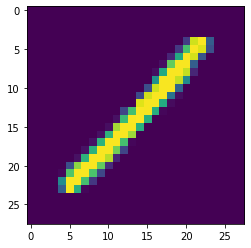

In [ ]:
idx = 12
image = np.array(images[idx, 0].detach().cpu()) # detach() : 연산에서 분리, cpu() : gpu()에서 내림
label = labels[idx].item()
pred = predicted[idx].item()

plt.imshow(image * 255)
print("Label :", label)
print("Prediction :", pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


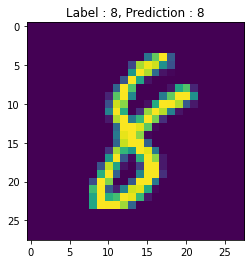

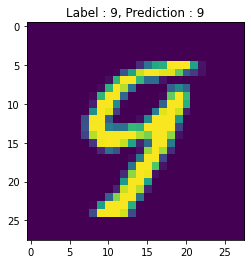

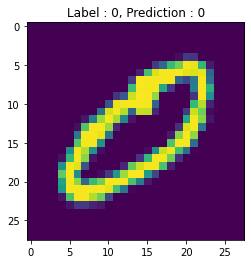

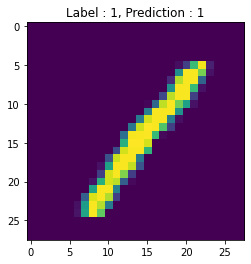

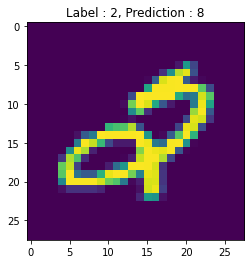

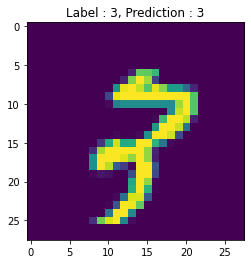

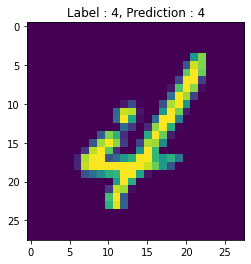

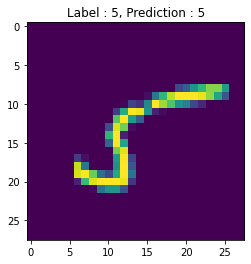

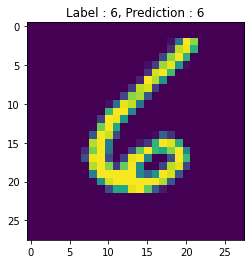

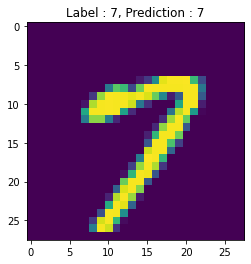

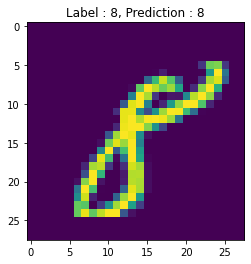

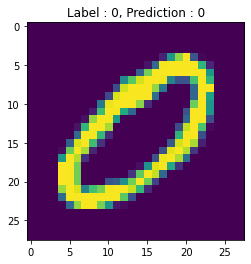

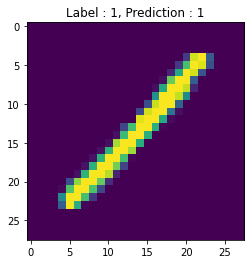

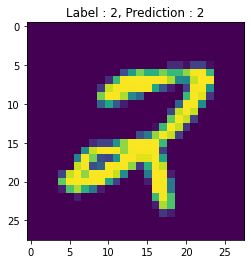

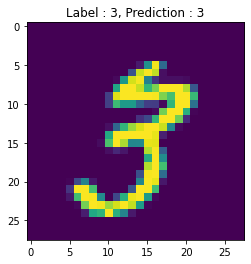

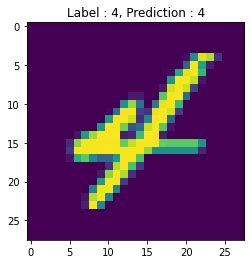

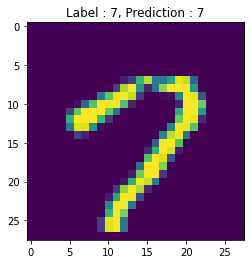

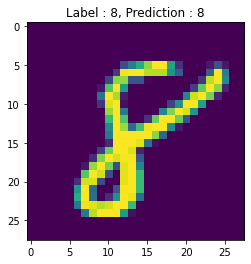

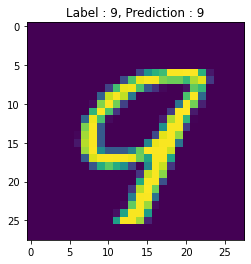

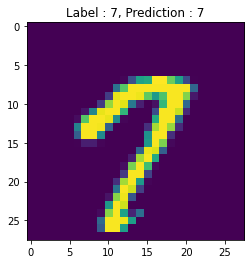

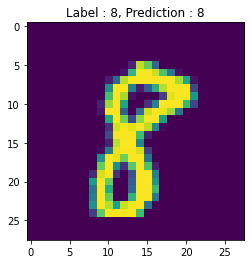

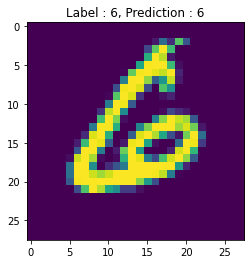

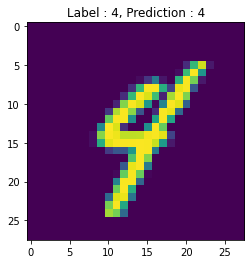

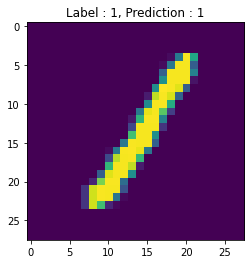

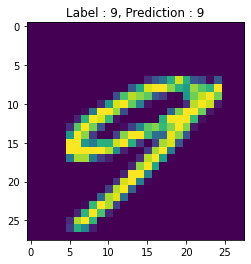

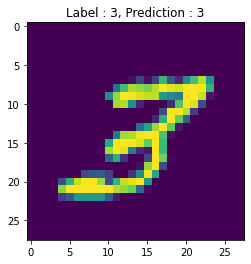

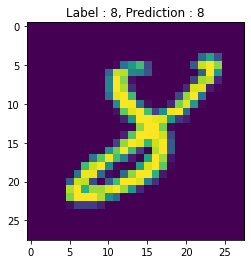

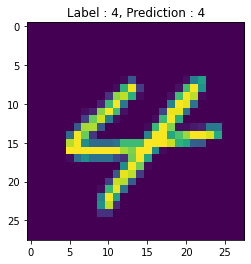

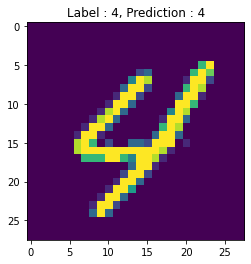

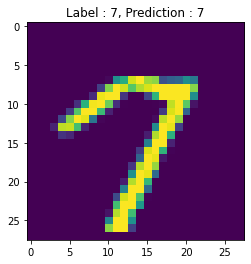

In [ ]:
for idx in range(30):
    image = np.array(images[idx, 0].detach().cpu())
    label = labels[idx].item()
    pred = predicted[idx].item()

    plt.figure()
    plt.title(f"Label : {label}, Prediction : {pred}")
    plt.imshow(image * 255)